In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [3]:
df.shape

(7095, 3)

In [4]:
import cv2

train_paths = "train_images/"

def load_images(image_paths,df):
    loadedImages = []
    
    for img in df.ImageId:
        image = cv2.imread(train_paths+img)
        loadedImages.append(image)
    return loadedImages

train_images = load_images(train_paths,df)

(256, 1600, 3)


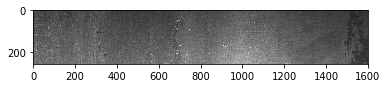

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
print(train_images[100].shape)
plt.imshow(train_images[0])

In [6]:
def resize_images(images):
    resizedimages = []  
    for img in images:  
        img = cv2.resize(img,(256,img.shape[0]))
        resizedimages.append(img)
    return resizedimages

train_images_r = resize_images(train_images)

(256, 256, 3)


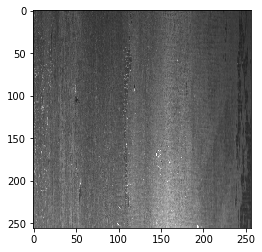

In [7]:
print(train_images_r[0].shape)
plt.imshow(train_images_r[0])

In [8]:
def features_to_np_array(images):
    imagenp = np.empty(shape = (len(images),images[0].shape[0],images[0].shape[1],images[0].shape[2]), dtype='uint8')
    idx = 0
    for img in images:
        imagenp[idx,:,:,:] = img[:,:,:]
        idx = idx+1
    imagenp = imagenp.reshape((imagenp.shape[0],imagenp.shape[1]*imagenp.shape[2]*imagenp.shape[3]))
    return imagenp
    
    
train_images = features_to_np_array(train_images_r)

In [9]:
train_images.shape

(7095, 196608)

In [10]:
y = pd.get_dummies(df.ClassId,columns='label')
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_images,y,test_size = 0.2,random_state=42, stratify=y)

In [12]:
X_train_r = X_train.reshape((5676,256,256,3))
X_train_r.shape

(5676, 256, 256, 3)

In [13]:
import tensorflow as tf
import random as rn

# Set up your models here
# Setting the seed for numpy-generated random numbers
np.random.seed(37)

# Setting the seed for python random numbers
rn.seed(1254)

# Setting the graph-level random seed.
tf.set_random_seed(89)

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

model = Sequential()
#model_28.add(Dense(128,input_dim = 784,activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape= (256,256,3), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_r,y_train,epochs=3,batch_size=100)

/Users/divyasankar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/divyasankar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256,..., activation="relu", padding="same")`
/Users/divyasankar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/Users/divyasankar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/Users/divyasankar

Epoch 1/3
5676/5676 [==============================] - 2905s 512ms/step - loss: 5.1530 - acc: 0.6713
Epoch 2/3
5676/5676 [==============================] - 856s 151ms/step - loss: 5.1689 - acc: 0.6762
Epoch 3/3
5676/5676 [==============================] - 751s 132ms/step - loss: 5.1689 - acc: 0.6762
